In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [163]:
milk=pd.read_csv('monthly-milk-production.csv',';',index_col=['month'],parse_dates=['month'],dayfirst=True)
milk1=pd.read_csv('monthly-milk-production.csv',';',parse_dates=['month'],dayfirst=True)

In [164]:
milk1.head()

,month,milk
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [187]:
milk.head()


,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


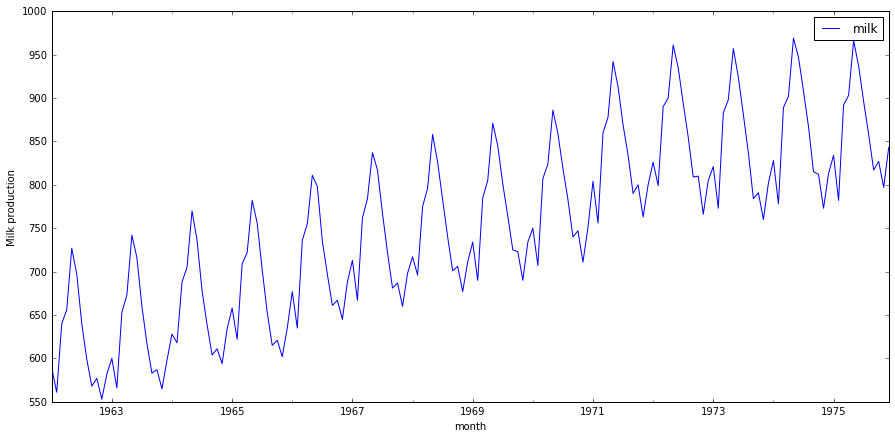

In [166]:
plt.figure(figsize(15,7))
milk.plot()
plt.ylabel('Milk production')
pylab.show()

# Применим к ряду критерий Дики-Фуллера.

In [167]:
import statsmodels.api as sm
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(milk.milk)[1])
sm.tsa.stattools.adfuller(milk.milk)

Критерий Дики-Фуллера: p=0.627427


(-1.3038115874221237,
 0.62742670860303429,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

$$Task  5$$
Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

In [168]:
pd.DatetimeIndex(milk1.month).days_in_month

array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31,
       30, 31, 31, 30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31,
       30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31,
       30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31,
       30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31,
       28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30,
       31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30,
       31, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30,
       31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30,
       31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31], dtype=int32)

In [169]:
milk1["daily"]=milk1.milk/pd.DatetimeIndex(milk1.month).days_in_month
milk1.head()

,month,milk,daily
0,1962-01-01,589,19.000000
1,1962-02-01,561,20.035714
2,1962-03-01,640,20.645161
3,1962-04-01,656,21.866667
4,1962-05-01,727,23.451613


In [170]:
milk1.daily.sum()

4166.326661899464

In [171]:
import calendar
print(calendar.monthrange(2016,5))

(6, 31)


$ TASK 6$

новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

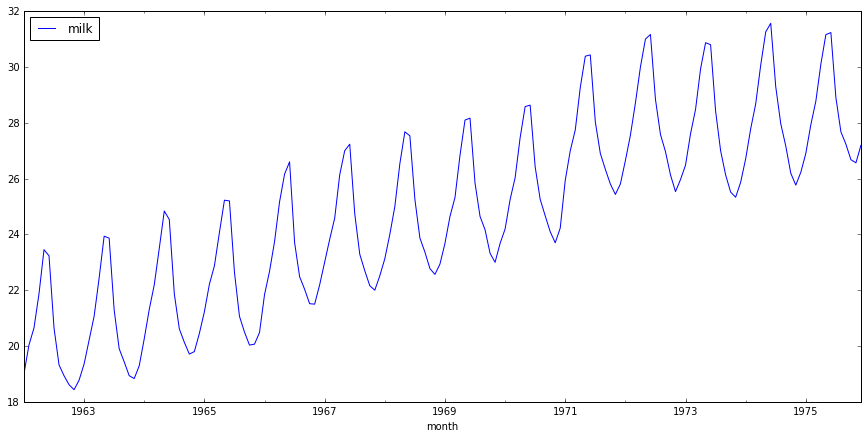

In [172]:
df=pd.read_csv('monthly-milk-production.csv',';',
                 parse_dates=['month'],index_col=['month'],dayfirst=True)
milk_day =pd.DataFrame(df.milk/df.index.days_in_month)
milk_day.plot()
plt.show()

$TASK 7$

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так:
milk.daily_diff1 = milk.daily - milk.daily.shift(1)
Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:
milk.daily_diff12 = milk.daily - milk.daily.shift(12)
При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Ответ. Ряд становится стационарным после двух последовательных дифференцирований — сезонного и обычного 


In [188]:
milk1['daily_diff1'] = milk1.daily - milk1.daily.shift(1)

In [190]:
milk1.head()

,month,milk,daily,daily_diff1,daily_diff_12,daily_diff_2
0,1962-01-01,589,19.000000,NaN,NaN,NaN
1,1962-02-01,561,20.035714,1.035714,NaN,NaN
2,1962-03-01,640,20.645161,0.609447,NaN,NaN
3,1962-04-01,656,21.866667,1.221505,NaN,NaN
4,1962-05-01,727,23.451613,1.584946,NaN,NaN


In [191]:
#milk1.daily_diff1[1:]

In [192]:
print("Критерий Дики-Фуллера после однократного дифференцирования: p=%f" 
      % sm.tsa.stattools.adfuller(milk1.daily_diff1[1:])[1])

Критерий Дики-Фуллера после однократного дифференцирования: p=0.064301


In [193]:
milk1['daily_diff_12'] = milk1.daily - milk1.daily.shift(12) 
print("Критерий Дики-Фуллера после сезонного дифференцирования: p=%f" 
      % sm.tsa.stattools.adfuller(milk1.daily_diff_12[12:])[1])

Критерий Дики-Фуллера после сезонного дифференцирования: p=0.221277


In [194]:
milk1['daily_diff_2'] = milk1.daily_diff_12 - milk1.daily_diff_12.shift(1)
print("Критерий Дики-Фуллерап осле двух последовательных дифференцирований — сезонного и обычного: p=%f" 
      % sm.tsa.stattools.adfuller(milk1.daily_diff_2[13:])[1])


Критерий Дики-Фуллерап осле двух последовательных дифференцирований — сезонного и обычного: p=0.000002


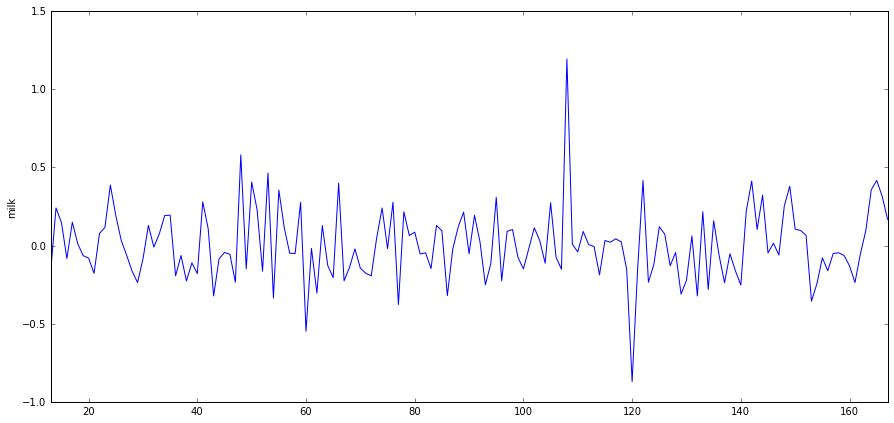

In [195]:
plt.figure(figsize(15,7))
milk1.daily_diff_2[13:].plot()
plt.ylabel('milk')

$TASK8$

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:

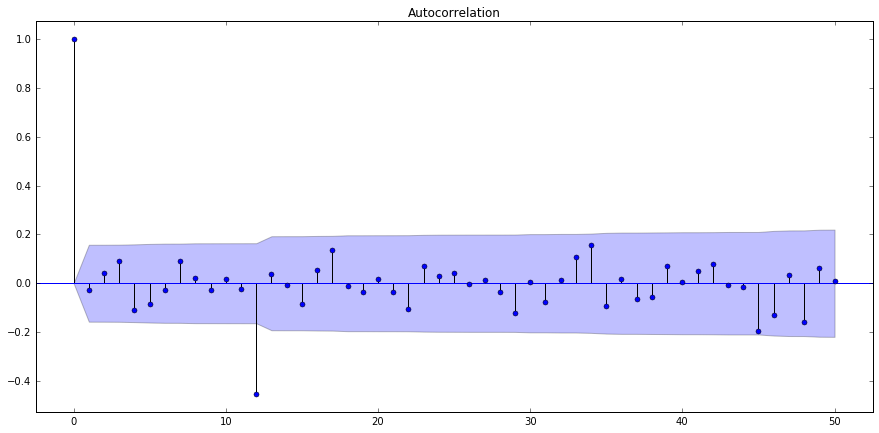

In [180]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk1.daily_diff_2[13:].values.squeeze(), lags=50)
plt.show()

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA? 1

$TASK9$

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Это можно сделать так:

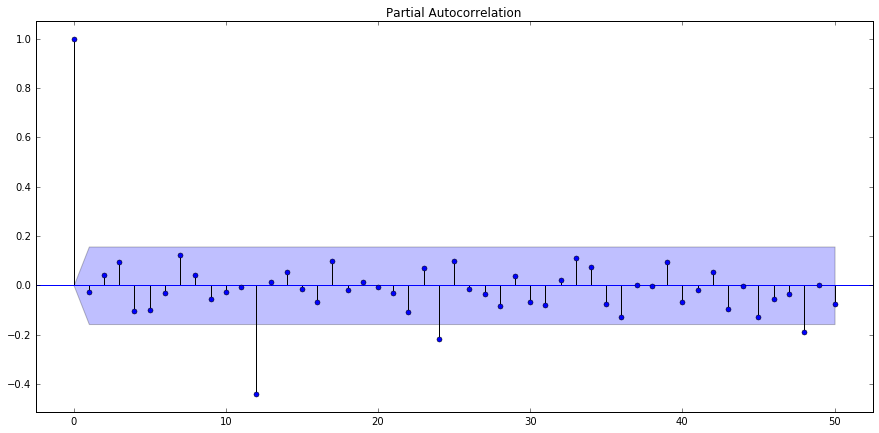

In [196]:

import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(milk1.daily_diff_2[13:].values.squeeze(), lags=50)
plt.show()

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA? 0
Начальное приближение для параметра P*S задает номер последнего сезонного лага, при котором частичная автокорреляция значима. Здесь-48. Поскольку длина сезонного перода S=12. p -номер последнего несезоднного лага, при котором частичная автокорреляция значима. p=0